In [15]:
import numpy as np #for linear algerba
import pandas as pd #for dataframes
import re #
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('imdb_dataset.csv/imdb_dataset.csv')
df.head(10)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


Need to remove
1. HtML tags
2. Punctuations
3. Removing any URLS
4. Chatword Treatment
5. correct any spelling
6. Removing stop words
7. Tokenization


Lowercasing all words





In [3]:
df['review'] = df['review'].str.lower()
df.head(10)

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
5,"probably my all-time favorite movie, a story o...",positive
6,i sure would like to see a resurrection of a u...,positive
7,"this show was an amazing, fresh & innovative i...",negative
8,encouraged by the positive comments about this...,negative
9,if you like original gut wrenching laughter yo...,positive


In [4]:
df['review'] = df['review'].str.replace('<.*?>', '', regex=True)
df['review'] = df['review'].str.replace(r'[^\w\s]', '', regex=True)
df['review'] = df['review'].str.replace(r'\d+', '', regex=True)

df['review'][0]


'one of the other reviewers has mentioned that after watching just  oz episode youll be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordit is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayi would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forget pretty picture

Removing Stopwords from the dataset

In [5]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dadab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Creating a function to remove stopwwords


In [6]:
def remove_stopwords(words):
    new_list = []
    for text in words.split():
        if text not in stop_words:  # Only add if it's not a stopword
            new_list.append(text)
    return " ".join(new_list)  # Directly return the joined result

        



In [7]:
df['review'] = df['review'].apply(remove_stopwords)
df.head(10)

,review,sentiment
0,one reviewers mentioned watching oz episode yo...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically theres family little boy jake thinks...,negative
4,petter matteis love time money visually stunni...,positive
5,probably alltime favorite movie story selfless...,positive
6,sure would like see resurrection dated seahunt...,positive
7,show amazing fresh innovative idea first aired...,negative
8,encouraged positive comments film looking forw...,negative
9,like original gut wrenching laughter like movi...,positive


In [8]:
df['review'][0]

'one reviewers mentioned watching oz episode youll hooked right exactly happened methe first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awayi would say main appeal show due fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well mannered middle cl

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [10]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['review'])
print(X_tfidf.shape)



(50000, 5000)


In [11]:
from gensim.models import Word2Vec
reviews = [review.split() for review in df['review']]
word2vec_model = Word2Vec(reviews, vector_size=100, window=5, min_count=2)
word2vec_model.wv.most_similar('wonderful')


[('fantastic', 0.8590065240859985),
 ('terrific', 0.7970854640007019),
 ('excellent', 0.7871657013893127),
 ('marvelous', 0.768596887588501),
 ('fabulous', 0.7678353190422058),
 ('superb', 0.7647699117660522),
 ('great', 0.7639648914337158),
 ('amazing', 0.7550183534622192),
 ('brilliant', 0.7488164901733398),
 ('outstanding', 0.7416021227836609)]

In [12]:
#mapping where positive is deemed as 1 and negative is deemed as 0
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['sentiment'], test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# To get the accuracy of the trained test
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')




Accuracy: 0.8867


In [13]:
# Count the number of positive and negative predictions
positive_reviews = np.sum(y_pred == 1)  # Assuming 1 indicates positive sentiment
negative_reviews = np.sum(y_pred == 0)  # Assuming 0 indicates negative sentiment

print(f'Number of positive reviews: {positive_reviews}')
print(f'Number of negative reviews: {negative_reviews}')


Number of positive reviews: 5176
Number of negative reviews: 4824


<Axes: title={'center': 'Classification of reviews'}>

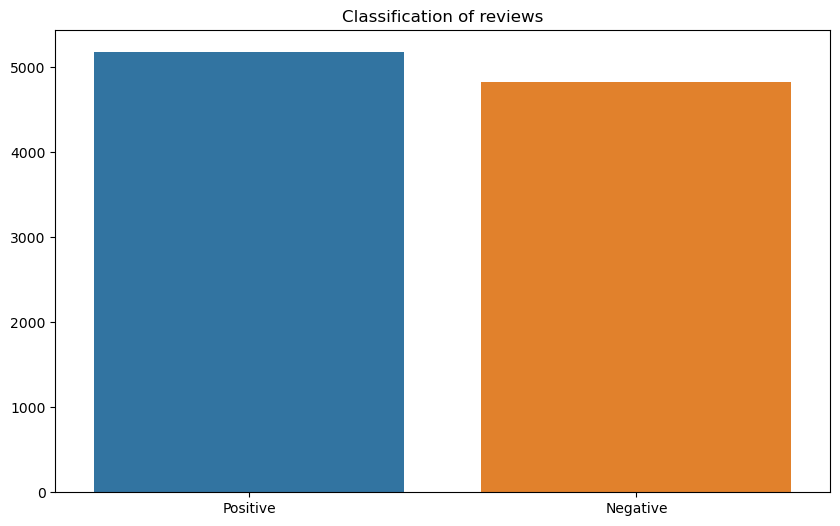

In [19]:
sentiment = ["Positive", "Negative"]
counts = [positive_reviews, negative_reviews]
#Set the width and Height
plt.figure(figsize=(10, 6))

#Add title
plt.title("Classification of reviews")

#Bar Chart showing the number of Positive reviews and negative reviews
sns.barplot(x=sentiment, y=counts) 

([<matplotlib.patches.Wedge at 0x2aeeb0fc750>,
 [Text(-0.06079024764755723, 1.0983189635943416, 'Positive'),
  Text(0.06079024764755685, -1.0983189635943416, 'Negative')],
 [Text(-0.03315831689866758, 0.599083071051459, '52%'),
  Text(0.03315831689866737, -0.599083071051459, '48%')])

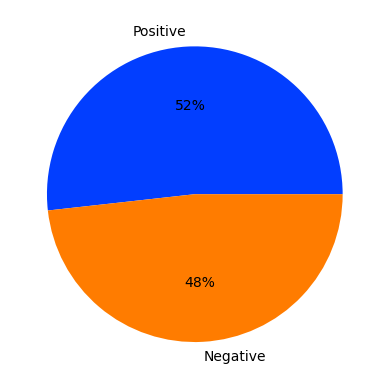

In [23]:
palette_color = sns.color_palette('bright')
counts_2 = [(positive_reviews/positive_reviews)*100, (negative_reviews/positive_reviews)*100]
plt.pie(counts_2, labels=sentiment, colors=palette_color, autopct="%.0f%%")